## A beginner-friendly Python tutorial using MLPRegressor from scikit-learn to build an ANN model. It includes:

Selecting the correct columns (1:7) from the Excel dataset.

Using fmp as the regression target.

Scaling the features.

Applying K-Fold Cross-Validation.

Visualizing results.

## 🧠 Regression with ANN (MLPRegressor) in Geotechnical Engineering using scikit-learn

## 📘 Step 1: Load and Inspect the Dataset

In [126]:
# Import required libraries
import pandas as pd

# Load Excel file
df = pd.read_excel('Collected Data_PS_GitHub upload.xlsx')

# Check shape and columns
print("Original shape:", df.shape)
print("Original columns:", df.columns.tolist())


Original shape: (19128, 13)
Original columns: ['itr', 'Slope Angle', 'CbygammaH', 'phi', 'kh', 'kvr', 'fmp', 'Xmp', 'Ymp', 'Rmp', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']


## ✅ Explanation:

We're reading the dataset using pandas.read_excel().

Then checking the number of rows/columns and column names.

## 📘 Step 2: Select the Right Columns (1 to 7)

In [129]:
# Select columns from index 1 to 6 (i.e., columns B to G in Excel)
df = df.iloc[:, 1:7]

# Rename columns for readability
df.columns = ['Slope_Angle', 'CbygammaH', 'phi', 'kh', 'kvr', 'fmp']

# View first few rows
df.head()

,Slope_Angle,CbygammaH,phi,kh,kvr,fmp
0,15,0.0,10,0.00,-0.5,0.67603
1,15,0.0,10,0.05,-0.5,0.56581
2,15,0.0,10,0.10,-0.5,0.48811
3,15,0.0,10,0.15,-0.5,0.43041
4,15,0.0,10,0.20,-0.5,0.38588


## ✅ Explanation:

We only want 6 columns: 5 inputs and 1 target (FMP).

Python uses 0-based indexing, so 1:7 selects columns 2–7.

Renaming helps keep code clean and readable.

## 📘 Step 3: Separate Features and Target

In [134]:
# Features and target
X = df.drop('fmp', axis=1)
y = df['fmp']


## 📘 Step 4: Feature Scaling

In [137]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🔍 Why Scale?

Neural networks are sensitive to the scale of data.

StandardScaler scales each feature to have mean = 0 and std = 1.

## 📘 Step 5: Define the ANN Model (MLPRegressor)

In [141]:
from sklearn.neural_network import MLPRegressor

# Define a simple ANN model
mlp = MLPRegressor(#hidden_layer_sizes=(100, 50),
                    hidden_layer_sizes=(4, 2),
                   
                   activation='relu',
                   solver='adam',
                   #learning_rate_init=0.1,
                   learning_rate_init=0.4,
                   max_iter=1000,
                   random_state=42)


## 📘 Step 6: Evaluate using K-Fold Cross Validation

In [144]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# K-Fold cross validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using R2 and MSE
r2_scores = cross_val_score(mlp, X_scaled, y, cv=kfold, scoring='r2')
mse_scores = -cross_val_score(mlp, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')

# Display results
print("R² Scores (5-Fold):", np.round(r2_scores, 4))
print("Average R²:", round(np.mean(r2_scores), 4))

print("\nMSE Scores (5-Fold):", np.round(mse_scores, 4))
print("Average MSE:", round(np.mean(mse_scores), 4))


R² Scores (5-Fold): [0.9698 0.9422 0.9604 0.9218 0.9684]
Average R²: 0.9525

MSE Scores (5-Fold): [0.0246 0.0472 0.0329 0.0642 0.0246]
Average MSE: 0.0387


## 🎯 K-Fold CV ensures:

Model evaluation is robust and generalizes well.

Prevents overfitting on a single train/test split.

## 📘 Step 7: Train Final Model and Make Predictions

In [147]:
# Fit on full data
mlp.fit(X_scaled, y)

# Predict
y_pred = mlp.predict(X_scaled)


## 📘 Step 8: Evaluate Final Model

In [149]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute final performance
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"Final R² Score: {r2:.4f}")
print(f"Final MSE: {mse:.4f}")


Final R² Score: 0.9055
Final MSE: 0.0768


## 📘 Step 9: Visualize Predictions

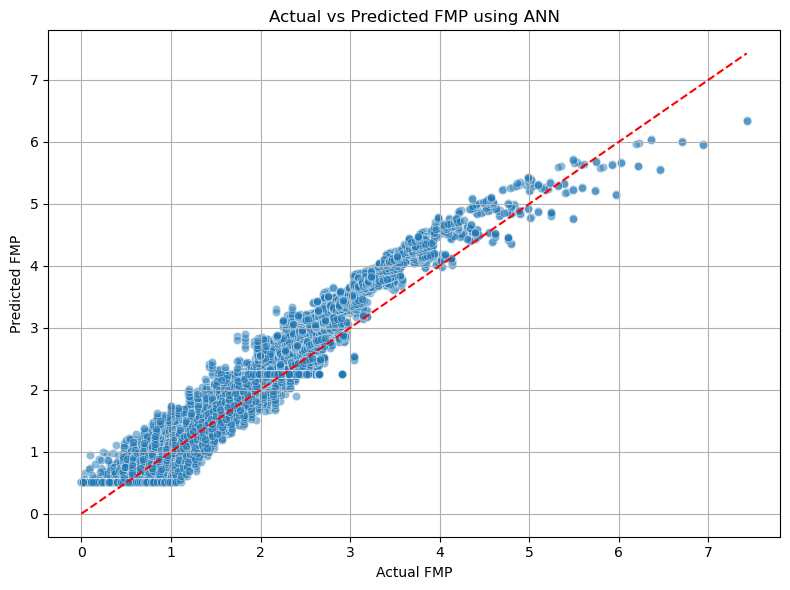

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual FMP')
plt.ylabel('Predicted FMP')
plt.title('Actual vs Predicted FMP using ANN')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Interpretation:

A perfect model would fall exactly on the red dashed line.

Scattering around the line shows model error.

## 📊 Code to Visualize the Summary Table of Pipeline Steps

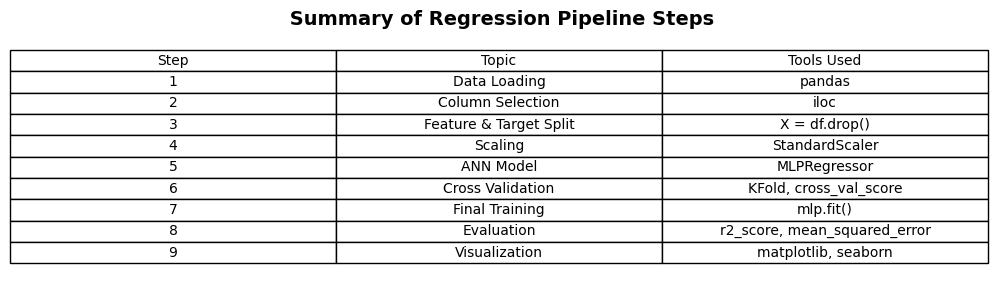

In [158]:

import matplotlib.table as tbl

# Define table content as a DataFrame
summary_df = pd.DataFrame({
    'Step': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Topic': [
        'Data Loading',
        'Column Selection',
        'Feature & Target Split',
        'Scaling',
        'ANN Model',
        'Cross Validation',
        'Final Training',
        'Evaluation',
        'Visualization'
    ],
    'Tools Used': [
        'pandas',
        'iloc',
        'X = df.drop()',
        'StandardScaler',
        'MLPRegressor',
        'KFold, cross_val_score',
        'mlp.fit()',
        'r2_score, mean_squared_error',
        'matplotlib, seaborn'
    ]
})

# Create a plot
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')  # Hide axes

# Create a table
table = tbl.table(ax, cellText=summary_df.values,
                  colLabels=summary_df.columns,
                  loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title(" Summary of Regression Pipeline Steps", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Hope this notebook has been helpful!
 
Created by: Abdul Waris, PMRF, IIT Hyderabad

For PG students and PhD Scholars at NIT Srinagar (Five Day Workshop on Introduction to FEM and ML in Geotechnical Engineering)